# Figure 8: Learning top-down weights

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import h5py
import EIANN as eiann
import EIANN.utils as ut
from EIANN.generate_figures import *

eiann.update_plot_defaults()
root_dir = ut.get_project_root()

In [2]:
figure_name = "Fig8_WB_alignment_FA_bpLike_BTSP"
model_list1 = ["bpLike_WT_hebbdend", "bpLike_fixedTD_hebbdend", "bpLike_TCWN_hebbdend"]
model_list2 = ["BTSP_WT_hebbdend", "BTSP_fixedTD_hebbdend", "BTSP_TCWN_hebbdend"]
all_models = model_list1 + model_list2

model_dict_all = load_model_dict()

generate_hdf5_all_seeds(all_models, model_dict_all, recompute=None, variables_to_save = ['test_accuracy_history', 'angle_vs_bp', 'feedback_weight_angle_history'])

['bpLike_WT_hebbdend', 'bpLike_fixedTD_hebbdend', 'bpLike_TCWN_hebbdend']
Generating plots for Symmetric ($B=W^T$)
Generating plots for Fixed random B (LDS)
Generating plots for Learned B: Contr. Hebb + W Norm.
['BTSP_WT_hebbdend', 'BTSP_fixedTD_hebbdend', 'BTSP_TCWN_hebbdend']
Generating plots for Symmetric ($B=W^T$)
Generating plots for Fixed random B
Generating plots for Learned B: Contr. Hebb + W Norm.


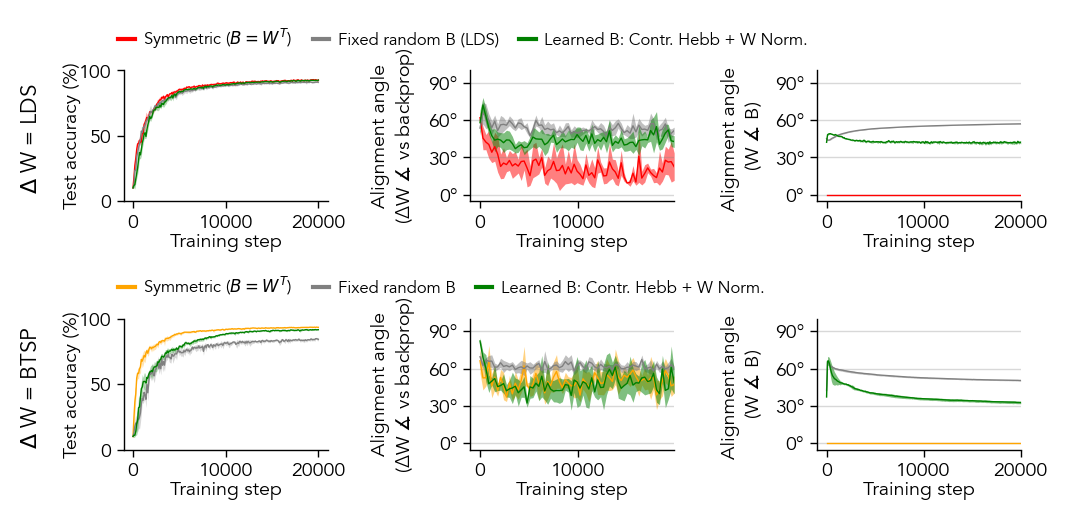

In [3]:
fig = plt.figure(figsize=(6.5, 2.4))
axes = gs.GridSpec(nrows=2, ncols=3, figure=fig,                    
                    left=0.28,right=0.97,
                    top=0.91, bottom = 0.12,
                    wspace=0.7, hspace=0.9)

model_dict_all["bpLike_WT_hebbdend"]["display_name"] = "$\Delta$ W = LDS"
model_dict_all["bpLike_WT_hebbdend"]["label"] = "Symmetric ($B=W^T$)"
model_dict_all["BTSP_WT_hebbdend"]["display_name"] = "$\Delta$ W = BTSP"
model_dict_all["BTSP_WT_hebbdend"]["label"] = "Symmetric ($B=W^T$)"

for row, model_list in enumerate([model_list1, model_list2]):
    print(model_list)
    ax_accuracy = fig.add_subplot(axes[row, 0])
    ax_angle_vs_BP = fig.add_subplot(axes[row, 1])
    ax_FB_angle = fig.add_subplot(axes[row, 2])
    for i, model_key in enumerate(model_list):
        model_dict = model_dict_all[model_key]
        network_name = model_dict['config'].split('.')[0]
        hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
        with h5py.File(hdf5_path, 'r') as f:
            data_dict = f[network_name]
            print(f"Generating plots for {model_dict['label']}")    
            plot_accuracy_all_seeds(data_dict, model_dict, ax=ax_accuracy)
            plot_angle_vs_bp_all_seeds(data_dict, model_dict, ax=ax_angle_vs_BP, error='std')
            plot_angle_FB_all_seeds(data_dict, model_dict, ax=ax_FB_angle, error='std')

        if i == 0:
            ax_accuracy.set_title(model_dict['display_name'], rotation=90, x=-0.45, y=0.35, va='center', fontsize=8)

    ax_accuracy.set_xlabel(ax_accuracy.get_xlabel(), ha='center', labelpad=0)
    ax_angle_vs_BP.set_xlabel(ax_angle_vs_BP.get_xlabel(), ha='center', labelpad=0)
    ax_FB_angle.set_xlabel(ax_FB_angle.get_xlabel(), ha='center', labelpad=0)
    legend = ax_accuracy.legend(ncol=3, bbox_to_anchor=(-0.1, 1.45), loc='upper left', fontsize=6)
    for line in legend.get_lines():
        line.set_linewidth(1.5)

fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)
fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.svg", dpi=300)